In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('dataset_part_2.csv')
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


C:\Users\arian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(39.43886458333333, 0.5, 'Pay load Mass (kg)')

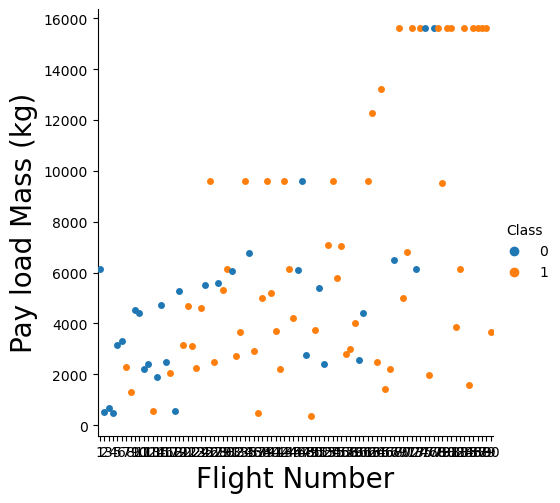

In [8]:
#let's try to see how the FlightNumber and Payload affect the launch outcome
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)

#as the flight number and payload mass increase, the outcome becomes more succesfull

## Visualize the relationship between Flight Number and Launch Site

C:\Users\arian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(45.69433333333332, 0.5, 'LaunchSite')

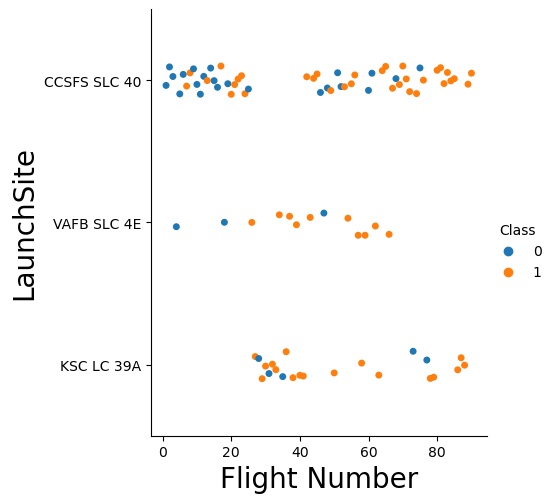

In [14]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)

## Visualize the relationship between Payload and Launch Site

C:\Users\arian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(45.69433333333332, 0.5, 'LaunchSite')

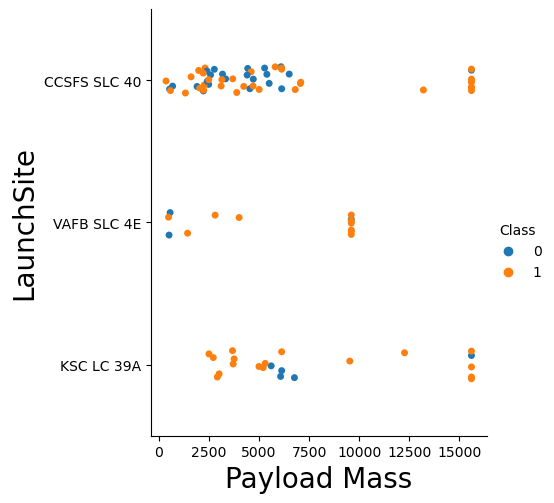

In [15]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df)
plt.xlabel("Payload Mass",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
#you can seee that for the VAFB-SLC launchsite there are no rockets launched 
#for heavypayload mass(greater than 10000)

## Visualize the relationship between success rate of each orbit type

<Axes: xlabel='Orbit'>

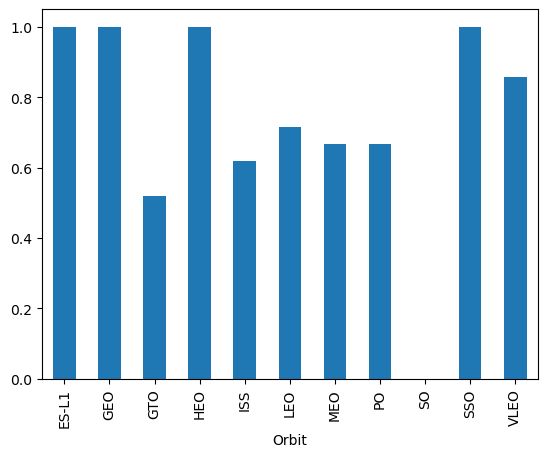

In [27]:
#First I calculate the average success rate per each orbit
Ave_Success_Rate = df.groupby('Orbit')['Class'].mean()
Ave_Success_Rate.plot(kind='bar', x = 'Orbit', y ='Ave_Success_Rate')

## Visualize the relationship between FlightNumber and Orbit type

C:\Users\arian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(38.80595833333332, 0.5, 'Orbit')

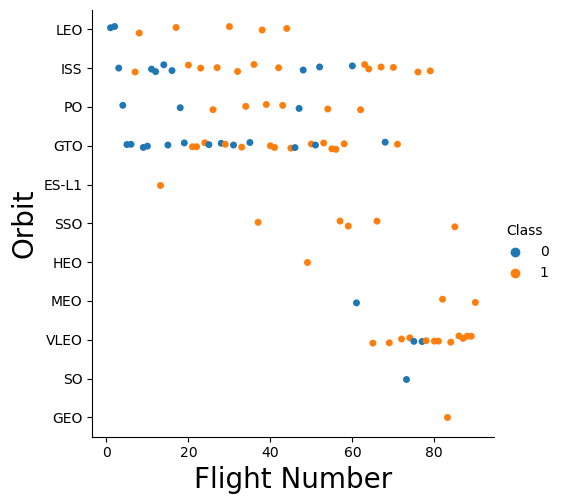

In [29]:
## Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)

#You should see that in the LEO orbit, the success appears related to the flight number; 
#on the other hand, there seems to be no relationship for the GTO orbit.

## Visualize the relationship between Payload and Orbit type

C:\Users\arian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(39.43886458333333, 0.5, 'Payload Mass')

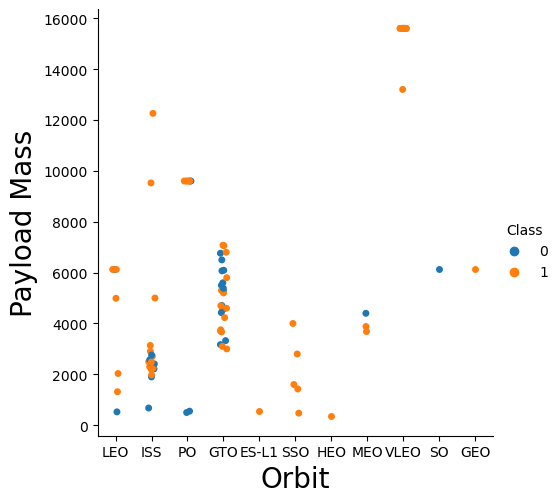

In [31]:
sns.catplot(y="PayloadMass", x="Orbit", hue="Class", data=df)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Payload Mass",fontsize=20)

#With heavy payloads the successful landing are more for Polar,LEO and ISS.
#However, you cannot really tell for GTO

## Visualize the launch success yearly trend

In [32]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


Text(0, 0.5, 'Average sucess rate')

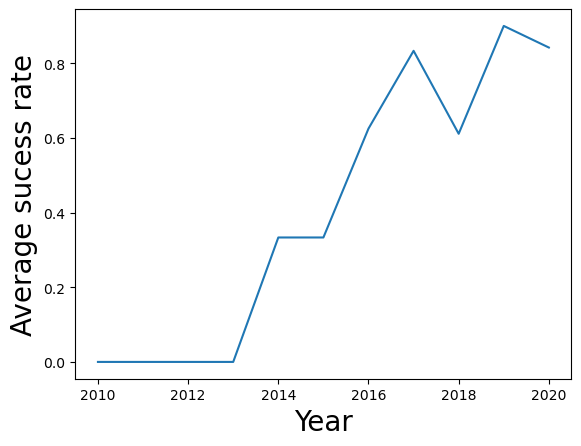

In [38]:
#I calculate the average success rate per year
Ave_Success_Rate = df.groupby('Date')['Class'].mean()
#These are the years
Years = [2010, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

plt.plot(Years, Ave_Success_Rate)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Average sucess rate",fontsize=20)
#the sucess rate since 2013 kept increasing till 2020

## Feature selection

In [39]:
#These seem to be the most important features, which we select for the future models
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


## Create dummy variables to categorical columns

In [52]:
#I need to do this for the columns Orbits, LaunchSite, LandingPad, and Serial
dummy_var1 = pd.get_dummies(features['Orbit'])
dummy_var2 = pd.get_dummies(features['LaunchSite'])
dummy_var3 = pd.get_dummies(features['LandingPad'])
dummy_var4 = pd.get_dummies(features['Serial'])

In [53]:
#now I add those columns to the features df
features_one_hot = pd.concat([features, dummy_var1, dummy_var2, dummy_var3, dummy_var4], axis=1)
features_one_hot.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,...,B1048,B1049,B1050,B1051,B1054,B1056,B1058,B1059,B1060,B1062
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,...,False,False,False,False,False,False,False,False,False,False


In [54]:
# drop the original columns that I converted into dummies
features_one_hot.drop(['Orbit', 'LaunchSite', 'LandingPad', 'Serial'], axis = 1, inplace=True)
features_one_hot.head()
#now the new dataframe is only numerical

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,ES-L1,GEO,...,B1048,B1049,B1050,B1051,B1054,B1056,B1058,B1059,B1060,B1062
0,1,6123.547647,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


## Cast all numeric columns to `float64`

In [55]:
#dince the df is all numerical, I can cast the entire df
features_one_hot= features_one_hot.astype(float)

In [56]:
#Export
features_one_hot.to_csv('dataset_part_3.csv', index=False)